In [1]:
import numpy as np
import matplotlib.pyplot as plt

from LSTM import *
from ANN import *

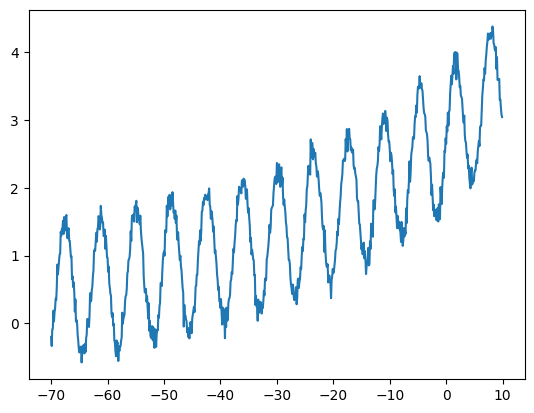

In [2]:
x = np.arange(-70,10,0.1)
x = x.reshape(len(x),1)
y = np.sin(x)+0.1*np.random.randn(len(x),1)+np.exp((0.5*x+20)*0.05)

plt.plot(x,y)
plt.show()

#### _Types of Model Training and Prediction_

##### 1. Predicting \( y_t \) from \( x_t \)
- **Description**: In this approach, the model is trained to predict the target variable \( y_t \) using the input feature \( x_t \).
- **Usage**: Common in scenarios where the target at time \( t \) depends directly on the input at the same time step.
- **Training**: The model learns the relationship between \( x_t \) (input) and \( y_t \) (target).
- **Prediction**: Given a new \( x_t \), the model predicts \( y_t \).

##### 2. Predicting \( y_{t + dt} \) from \( y_t \)

- **Description**: This approach involves training the model to predict the future value \( y_{t + dt} \) based on the current value \( y_t \).
- **Usage**: Common in time series forecasting, where future values are predicted based on past observed values of the target variable.
- **Training**: The model learns the sequential dependency between \( y_t \) and \( y_{t + dt} \).
- **Prediction**: Given \( y_t \), the model predicts the next step \( y_{t + dt} \).

These approaches can be used based on the nature of your data and the type of prediction or forecasting required.

(200, 1) 801


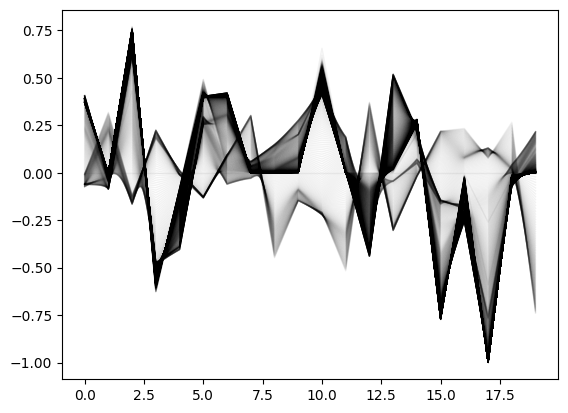

In [3]:
lstm1 = LSTM(no_neurons= 200)
lstm1.forward(x)

for h in lstm1.H:   # This is not a yt but ht for only 20 neurons 
    plt.plot(np.arange(20),h[0:20],'k-',linewidth=1,alpha=0.05)

print(lstm1.H[0].shape,len(lstm1.H))

(200, 1) 801


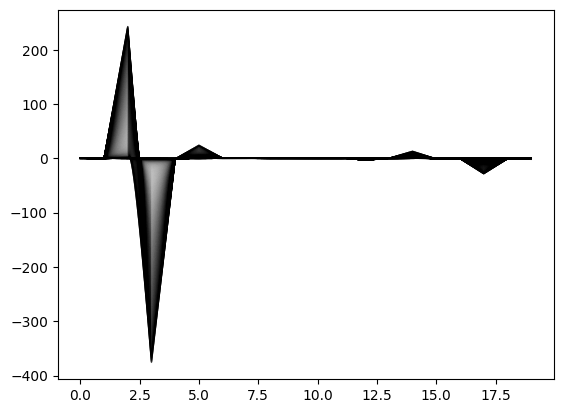

In [4]:
for c in lstm1.C:  
    plt.plot(np.arange(20),c[0:20],'k-',linewidth=1,alpha=0.05)
    
print(lstm1.C[0].shape,len(lstm1.C))

_Each LSTM cell’s output, \( h_t \), is fed into an ANN to predict \( y_t \) at each time step. This setup enables the model to generate a sequence of predictions \( y_1, y_2, till , y_T \), leveraging the temporal information captured in \( h_t \) from the LSTM. The ANN learns to map these temporal patterns to the target outputs during training, making sequential predictions over time._


Loss MSE : 1.827
Loss MSE : 0.332
Loss MSE : 0.240
Loss MSE : 0.220
Loss MSE : 0.211
Loss MSE : 0.205
Loss MSE : 0.200
Loss MSE : 0.195
Loss MSE : 0.189
Loss MSE : 0.184
Loss MSE : 0.180


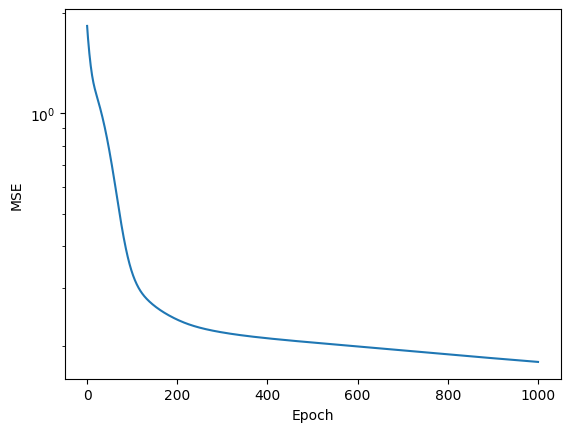

In [5]:
no_neurons = 500
lstm = LSTM(no_neurons=no_neurons)
T = max(x.shape)
lstm.forward(x)
H=lstm.H
dense1 = DenseLayer(input_size=no_neurons,number_of_neurons=T) # number of neurons can be any based on archtitecture needed
dense2 = DenseLayer(input_size=T,number_of_neurons=1)

learning_rate = 1e-5
epochs = 1001

monitor = np.zeros((epochs))

for n in range(epochs):
    lstm.forward(x_data=x)
    H = np.array(lstm.H)
    H = H.reshape((H.shape[0],H.shape[1]))

    dense1.forward(H[1:,:]) # h[0] = 0 WHICH WE INTILIZED FOR THE FIRST CELL TO TAKE h 
    dense2.forward(dense1.output)

    y_pred = dense2.output

    dy = y_pred - y 

    l = 0.5 * np.mean(dy ** 2)

    monitor[n] = l

    dense2.backward(dy)
    dense1.backward(dense2.dinputs)

    lstm.backward(dense1.dinputs)

    dense2.weights -= learning_rate*dense2.dweights
    dense2.bias -= learning_rate*dense2.bias

    dense1.weights -= learning_rate*dense1.dweights
    dense1.bias -= learning_rate*dense1.dbias

    lstm.Uf -= learning_rate*lstm.dUf
    lstm.Wf -= learning_rate*lstm.dWf
    lstm.bf -= learning_rate*lstm.dbf

    lstm.Ui -= learning_rate*lstm.dUi
    lstm.Wi -= learning_rate*lstm.dWi
    lstm.bi -= learning_rate*lstm.dbi

    lstm.Uo -= learning_rate*lstm.dUo
    lstm.Wo -= learning_rate*lstm.dWo
    lstm.bo -= learning_rate*lstm.dbo

    lstm.Ug -= learning_rate*lstm.dUg
    lstm.Wg -= learning_rate*lstm.dWg
    lstm.bg -= learning_rate*lstm.dbg

    if n%100 == 0:
        print(f'Loss MSE : {l:0.3f}')

plt.plot(range(epochs),monitor)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.yscale('log')

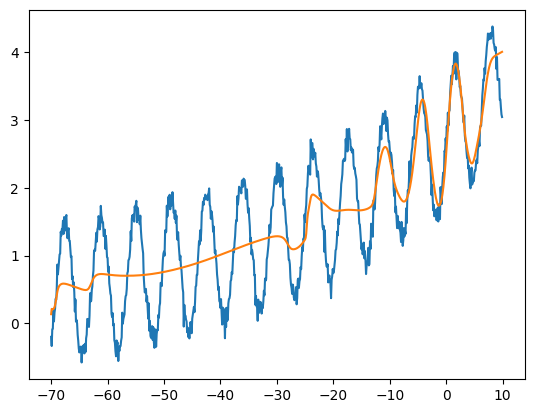

In [6]:
plt.plot(x,y)
plt.plot(x,y_pred)

Loss MSE : 1.772
Loss MSE : 0.222
Loss MSE : 0.229
Loss MSE : 0.190
Loss MSE : 0.181
Loss MSE : 0.184
Loss MSE : 0.178
Loss MSE : 0.175
Loss MSE : 0.173
Loss MSE : 0.170
Loss MSE : 0.168


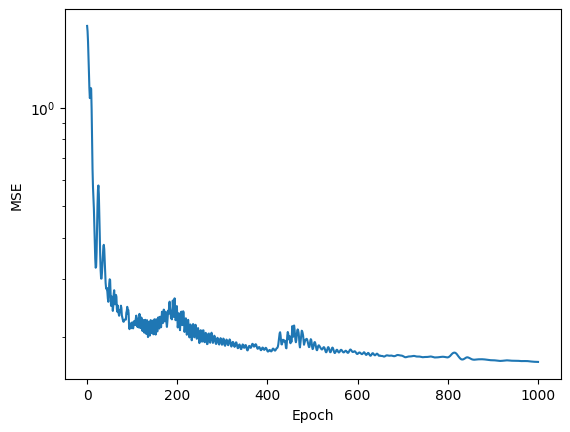

In [7]:
no_neurons = 500
lstm = LSTM(no_neurons=no_neurons)
T = max(x.shape)
lstm.forward(x)
H=lstm.H
dense1 = DenseLayer(input_size=no_neurons,number_of_neurons=T) # number of neurons can be any based on archtitecture needed
dense2 = DenseLayer(input_size=T,number_of_neurons=1)

learning_rate_lstm = 1e-4
learning_rate_ann = 1e-5
lstm_optimizer = Optimizer_SGD_LSTM(learning_rate=learning_rate_lstm,decay=0.001,momentum=0.99)
ann_optimizer = SGD_Optimizer(learning_rate=learning_rate_ann,decay=0.01,momentum=0.99)
relu = ReluActivation()
epochs = 1001

monitor = np.zeros((epochs))

for n in range(epochs):
    lstm.forward(x_data=x)
    H = np.array(lstm.H)
    H = H.reshape((H.shape[0],H.shape[1]))

    dense1.forward(H[1:,:]) # h[0] = 0 WHICH WE INTILIZED FOR THE FIRST CELL TO TAKE h 
    relu.forward(dense1.output)
    dense2.forward(relu.output)

    y_pred = dense2.output

    dy = y_pred - y 

    l = 0.5 * np.mean(dy ** 2)

    monitor[n] = l

    dense2.backward(dy)
    relu.backward(dense2.dinputs)
    dense1.backward(relu.dinputs)

    lstm.backward(dense1.dinputs)

    ann_optimizer.pre_update()
    ann_optimizer.parameter_update(dense1)
    ann_optimizer.parameter_update(dense2)
    ann_optimizer.post_update()

    lstm_optimizer.pre_update_params()
    lstm_optimizer.update_params(lstm)
    lstm_optimizer.post_update_params()


    if n%100 == 0:
        print(f'Loss MSE : {l:0.3f}')

plt.plot(range(epochs),monitor)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.yscale('log')

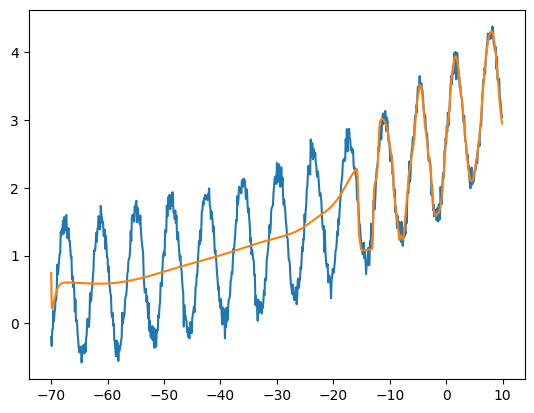

In [8]:
plt.plot(x,y)
plt.plot(x,y_pred)